In [4]:
import sys
sys.path.append('..')
from dno.proto.mock import MockInterop, TaskReader
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
from dno.proto.data import Task

In [34]:
task_num = 1
tr = TaskReader("..\\data\\besthack19\\task" + str(task_num))

In [76]:
map_raw, data_raw, score = tr.read_all()
n = int(sqrt(len(map_raw["map"])))
map_arr = np.array(map_raw["map"]).reshape(n,n)
print(map_arr)

[[17132 17573 18053 ... 54525 54607 54668]
 [16909 17303 17601 ... 54533 54615 54659]
 [16832 17129 17230 ... 54591 54651 54643]
 ...
 [ 4179  4158  4048 ... 48801 48886 48933]
 [ 4042  4049  3945 ... 48710 48736 48777]
 [ 3911  3946  3881 ... 48562 48652 48793]]


In [36]:
flight = {"X":int(n/2), "Y":int(n/2)}
delta = {"X":0, "Y":0}
flight_hist = {"X":[], "Y":[]}
prepre = {"X":[], "Y":[]}

In [37]:
import copy
from math import fabs

delt = {"X":1, "Y":1}
predict = []
for data in data_raw:
    d = data["data"]
    parsed = Task.from_dict(d)
    flight_hist["X"].append(parsed.x)
    flight_hist["Y"].append(parsed.y)
    flight["X"] += parsed.vx
    flight["Y"] += parsed.vy
    prepre["X"].append(flight["X"])
    prepre["Y"].append(flight["Y"])
    delta["X"] += parsed.vx
    delta["Y"] += parsed.vy
    for coord in ["X", "Y"]:
        if fabs(delta[coord]) >= n/(delt[coord] + 1):
            flight[coord] -= delta[coord]
            delta[coord] = fabs(delta[coord]) - n/(delt[coord] + 1)
            delt[coord] += 1

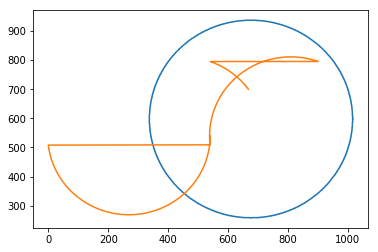

In [38]:
plt.plot(flight_hist["X"], flight_hist["Y"], prepre["X"], prepre["Y"])

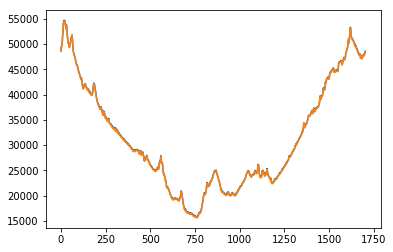

In [39]:
height_hist = []
land_height = []
for data in data_raw:
    d = data["data"]
    parsed = Task.from_dict(d)
    height_hist.append(d["height"])
    land_height.append(map_arr[parsed.y][parsed.x])
plt.plot(range(0, len(data_raw)), height_hist, range(0, len(data_raw)), land_height)

In [55]:
def get_candidates(data, map_arr, c=204):
    candidates = []
    d_height = data["height"]
    for i in range(0, n):
        for j in range(0, n):
            delta = d_height - map_arr[j][i]
            if delta > 0 and delta <= 200:
                candidates.append([j, i])
    return candidates

candidates = get_candidates(data_raw[0]["data"], map_arr)
print(len(candidates))

2325


In [54]:
max_delta = 0
for task in range(1, 32):
    t = TaskReader("..\\data\\besthack19\\task" + str(task_num))
    map_raw, data_raw, _ = tr.read_all()
    n = int(sqrt(len(map_raw["map"])))
    negative = 0
    map_arr = np.array(map_raw["map"]).reshape(n, n)
    for data in data_raw:
        d = data["data"]
        d_h = d["height"]
        x = d["y"]
        y = d["x"]
        point_h = map_arr[x, y]
        delta = d_h - point_h
        if delta < 0:
            print(f"Negative delta. Task {task} for point [{x}, {y}]")
        max_delta = max(delta, max_delta)
    print("tmp delta " + str(max_delta) + ". TASK " + str(task))
print(max_delta)

tmp delta 203. TASK 1
tmp delta 203. TASK 2
tmp delta 203. TASK 3
tmp delta 203. TASK 4
tmp delta 203. TASK 5
tmp delta 203. TASK 6
tmp delta 203. TASK 7
tmp delta 203. TASK 8
tmp delta 203. TASK 9
tmp delta 203. TASK 10
tmp delta 203. TASK 11
tmp delta 203. TASK 12
tmp delta 203. TASK 13
tmp delta 203. TASK 14
tmp delta 203. TASK 15
tmp delta 203. TASK 16
tmp delta 203. TASK 17
tmp delta 203. TASK 18
tmp delta 203. TASK 19
tmp delta 203. TASK 20
tmp delta 203. TASK 21
tmp delta 203. TASK 22
tmp delta 203. TASK 23
tmp delta 203. TASK 24
tmp delta 203. TASK 25
tmp delta 203. TASK 26
tmp delta 203. TASK 27
tmp delta 203. TASK 28
tmp delta 203. TASK 29
tmp delta 203. TASK 30
tmp delta 203. TASK 31
203


In [73]:
from math import sqrt

class PetrFinder:
    def __init__(self, map_raw, c = 204):
        self.n = sqrt(len(map_raw["map"]))
        self.map_arr = np.array(map_raw["map"]).reshape(n, n)
        self.candidates = []
        self.c = c
        
    def handle_task(self, task: Task):
        if not self.candidates:
            self.candidates = self.init_candidates(task)
        else:
            self.candidates = self.filter_by_task(task)
            
    def init_candidates(self, task: Task):
        for i in range(0, n):
            for j in range(0, n):
                delta = task.height - self.map_arr[j][i]
                if delta > 0 and delta <= self.c:
                    candidates.append([j, i])
        return candidates
    
    def filter_by_task(self, task: Task):
        next_candidates = []
        for candidate in candidates:
            next_x = candidate[0] + task.vx 
            next_y = candidate[1] + task.vy
            try:
                delta = task.height - self.map_arr[next_x][next_y]
                if delta > 0 and delta < self.c:
                    next_candidates.append([next_x, next_y])
            except IndexError:
                continue
        return next_candidates

In [74]:
pf = PetrFinder(map_raw)
for data in data_raw:
    d = Task.from_dict(data["data"])
    pf.handle_task(d)
    print(len(pf.candidates))

4698
0
7163
0
9455
0


KeyboardInterrupt: 